In [17]:
# Configuracion para recargar módulos y librerías 
%reload_ext autoreload
%autoreload 2

# MAT281 - Laboratorio 7

## Aplicaciones de la Matemática en la Ingeniería

Puedes ejecutar este jupyter notebook de manera interactiva:

[![Binder](../shared/images/jupyter_binder.png)](https://mybinder.org/v2/gh/sebastiandres/mat281_m04_data_science/master?filepath=/02_holdout_set_y_cross_validation//02_holdout_set_y_cross_validation.ipynb)

[![Colab](../shared/images/jupyter_colab.png)](https://colab.research.google.com/github/sebastiandres/mat281_m04_data_science/blob/master///02_holdout_set_y_cross_validation//02_holdout_set_y_cross_validation.ipynb)

## __Intrucciones__

* Completa tus datos personales (nombre y rol USM).
* Debes enviar este .ipynb con el siguiente formato de nombre: 07_formato_datos_NOMBRE_APELLIDO.ipynb con tus respuestas a alonso.ogueda@gmail.com y sebastian.flores@usm.cl .
* Se evaluará:
    - Soluciones
    - Código
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.
    - La escala es de 0 a 4 considerando solo valores enteros.
* __La entrega es al final de esta clase.__

__Nombre__:

__Rol__:

## ¿Qué contenido aprenderemos?
Estimar el error al aplicar uno o varios modelos a los datos, utilizando la técnica de **Holdout Set**.

## Motivación

Resulta imposible conocer a priori que modelo explicará de mejor manera un cierto conjunto de datos. Las técnicas de Holdout Set (y Cross Validation) permiten estimar el error que posee el modelo.

## Problema: Abalone Dataset

Los datos Abalone Dataset corresponden a medidas físicas de abulones u orejas marinas (abalones), una especia de lapa o caracol marino comestibles. Este set de datos fue descrito por Sam Waugh para su tesis de doctorado, en la cual utilizó los datos para ilustrar el comportamiento de algoritmos de clasificación. Desde entonces, se ha utilizado para verificar algoritmos de clasificación y regresión.

<img src="images/abalone.jpg" alt="" width="600px" align="middle"/>

La base de datos contiene mediciones a 4177 abalones, donde las mediciones posibles son sexo ($S$), peso entero $W_1$, peso sin concha $W_2$, peso de visceras $W_3$, peso de concha  $W_4$, largo ($L$), diametro $D$, altura $H$, y el número de anillos $N$. 

Buscaremos **predecir el número de anillos**, utilizando las otras variables.

## Modelos propuestos

Los modelos propuestos son los siguientes:

#### Modelo A
Consideramos 9 parámetros, llamados $\alpha_i$, para el siguiente modelo:
$$ \log(A) = \alpha_0 +  \alpha_1 W_1 + \alpha_2 W_2 +\alpha_3 W_3 +\alpha_4 W_4 + \alpha_5 S + \alpha_6 \log L + \alpha_7 \log D+  \alpha_8 \log H$$

#### Modelo B
Consideramos 6 parámetros, llamados $\beta_i$, para el siguiente modelo:
$$ \log(A) = \beta_0 + \beta_1 W_1 + \beta_2 W_2 +\beta_3 W_3 +\beta W_4 + \beta_5 \log( L  D H ) $$

#### Modelo C
Consideramos 12 parámetros, llamados $\theta_i^{k}$, con $k \in \{M, F, I\}$, para el siguiente modelo:

Si $S=male$:
$$ \log(A) = \theta_0^M + \theta_1^M W_2  + \theta_2^M W_4 + \theta_3^M \log( L  D H ) $$

Si $S=female$
$$ \log(A) = \theta_0^F + \theta_1^F W_2  + \theta_2^F W_4 + \theta_3^F \log( L  D H ) $$

Si $S=indefined$
$$ \log(A) = \theta_0^I + \theta_1^I W_2  + \theta_2^I W_4 + \theta_3^I \log( L  D H ) $$

***¿Cómo podríamos de manera científica saber cuál de los modelos planteados representa de mejor manera al conjunto de datos?***

## 1. Descargando los datos
Utilizaremos los datos del dataset que se pueden descargar desde el siguiente link:
http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data

## 2. Leyendo los datos
A continuación se le provee cierto código para que lea los datos desde el archivo data/abalone.data.txt y los cargue en un arreglo en numpy.

In [1]:
%%bash
head data/abalone.data.txt

M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
M,0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
F,0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
M,0.44,0.365,0.125,0.516,0.2155,0.114,0.155,10
I,0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7
I,0.425,0.3,0.095,0.3515,0.141,0.0775,0.12,8
F,0.53,0.415,0.15,0.7775,0.237,0.1415,0.33,20
F,0.545,0.425,0.125,0.768,0.294,0.1495,0.26,16
M,0.475,0.37,0.125,0.5095,0.2165,0.1125,0.165,9
F,0.55,0.44,0.15,0.8945,0.3145,0.151,0.32,19


In [26]:
import numpy as np
# Cargando los datos
data = []
fh = open("data/abalone.data.txt","r")
# Estructura de datos:
# 'sex','length','diameter','height','weight.whole','weight.shucked','weight.viscera','weight.shell','rings'
# Ejemplo de linea
conversion_sexo = {"M":+1, "I":0, "F":-1} # Para Male, Incognito y Female
for line in fh:
    abalone = line.split(",")
    abalone[0] = conversion_sexo[abalone[0]]
    data.append([float(x) for x in abalone])
fh.close()
# Convertir lista a array
data = np.array(data)
# Limpiando datos erroneos (todos los valores excepto sexo deben ser estricamente positivos)
mask = np.all(data[:,1:]>0, axis=1)
abalone_data = data[mask]
# Imprimir datos (opcional)
#print data[:10]

## Desafío 1
**1.** ¿Que significado tiene la siguiente expresión en el código para cargar los datos? ¿Porqué se realiza?

    abalone[0] = conversion_sexo[abalone[0]]

*Respuesta*: ...

**2.** ¿Resulta relevante que la codificación del sexo del abalone sea '"M":+1, "I":0, "F":-1' y no, por ejemplo otros valores como, '"M":0, "I":5, "F":45'?

*Respuesta*: ...


## 3. Exploración visual de los datos
A continuación se le provee código para generar visualizaciones de los datos. Ejecute secuencialmente e interprete los gráficos.

In [20]:
from matplotlib import pyplot as plt
def plot(data, i, j):
    label = ['Sexo',
             'Largo',
             'Diametro',
             'Altura',
             'Peso Entero',
             'Peso Desconchado',
             'Peso Viscera',
             'Peso Concha',
             'Numero Anillos']
    M_mask = data[:,0] == +1
    I_mask = data[:,0] == 0
    F_mask = data[:,0] == -1
    plt.figure(figsize=(16,8))
    plt.plot(data[:,i][M_mask], data[:,j][M_mask], "og", label="M")
    plt.plot(data[:,i][F_mask], data[:,j][F_mask], "sr", label="F")
    plt.plot(data[:,i][I_mask], data[:,j][I_mask], "<b", label="I")
    plt.xlabel(label[i])
    plt.ylabel(label[j])
    plt.legend()
    plt.show()

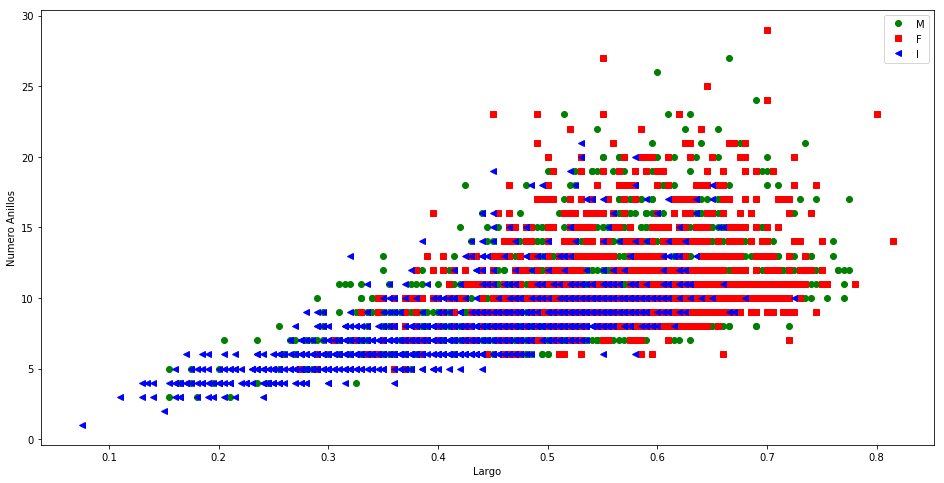

In [27]:
"""
Sandbox: Cambie los parámetros para obtener distintos gráficos

Indices:
0:'Sexo',
1:'Largo',
2:'Diametro',
3:'Altura',
4:'Peso Entero',
5:'Peso Desconchado',
6:'Peso Viscera',
7:'Peso Concha',
8:'Numero Anillos'
"""
plot(abalone_data, 1, 8)

## Desafío 2
**1.** ¿Cómo se reparten los estados M, F e I? ¿Podemos prescindir de los datos con estado "I"?

*Respuesta*:

## 4. Holdout Set

La técnica del holdout set separa los datos en 2 grupos.
* El primero de los grupos permitirá entrenar el modelo y obtener los parámetros del modelo.
* El segundo de los grupos se utilizará obtener una estimación del error (predictivo) del modelo.

<img src="images/HoldoutSet.png" alt="" width="600px" align="middle"/>

## Características

* Típicamente se separa el 30 % de los datos para el testeo del modelo.
* Esto significa que el modelo se entrena en un conjunto menor de datos, y por tanto el modelo no será tan bueno como si se entrenara en el conjunto completo de datos.
* El modelo se entrena en el conjunto de Training, sin utilizar ningun ejemplo del conjunto de datos Test.
* El evaluar el modelo entrenado en los datos del conjunto de Test, el modelo se está aplicando por primera vez en esos datos, y por tanto, la estimación del error no continene bias.

## Importante
* El procedimiento estándar es reportar el error entregado en el set de predicción, pero luego volver a entregar el modelo utilizando todos los datos simultáneamente. La partición Training-Test se realiza para tener una estimación del error.
* El error reportado es una estimación conservativa, puesto que al entrenar en todos los datos el error del modelo actual típicamente disminuirá... ¡pero ya no tenemos datos para hacer una mejor estimación!
* Predicciones conservativas son mejores que predicciones optimistas.

## Ejemplo

Ilustraremos el funcionamiento del método con datos sintéticos:
$$ y(x) = 5 \cos \Big( \frac{\pi}{4} x \Big) + \mathcal{N}\Big(0,1\Big)$$

Buscaremos ajustar un modelo del tipo
$$ y(x) = a \cos \Big( b x + c\Big) + d$$
minimizando el error cuadrático.

El error predictivo del modelo será calculado utilizando RMSE (Root Mean Square Error):
$$ E(o,p) = \sqrt{ \frac{1}{N}\sum_{i=1}^N (o_i - p_i)^2 }$$
El RMSE corresponde a la desviación estándar de los residuos.

## Implementación Numérica de holdout set
La implementación numérica del holdout set no depende del modelo a ajustar: puede realizarse para regresion lineal o logística, modelos discretos, y cualquier otro algoritmos de machine learning, etc.

Los pasos son:
1. Realizar la partición en datos de entrenamiento y de predicción.
2. Obtener los coeficientes del modelo utilizando los datos de entrenamiento.
3. Utilizar el modelo entrenado para realizar predicción de datos en el set de predicción.
4. Comparar la predicción realizada con los datos reales (conocidos en el set de predicción), para estimar el error de predicción.
5. Obtener los coeficientes del modelo todos los datos de entrenamiento.

En general la fórmula del error a calcular viene dado de manera natural por el tipo de problema y modelo utilizado. No siempre es el mismo.

Prediction error estimated on 1.0607 
The obtained model parameters for training dataset are:
	(a,b,c,d) = (5.659, 0.762, 0.006, -0.329)
The obtained model parameters for the whole dataset are:
	(a,b,c,d) = (5.728, 0.752, 0.014, -0.322)
The true model parameters are:
	(a,b,c,d) = (5.000, 0.785, 0.000, 0.000)

Conservative error estimation on testing dataset: 1.06
Pure random error on testing dataset: 1.11
Pure random error on all data: 1.04


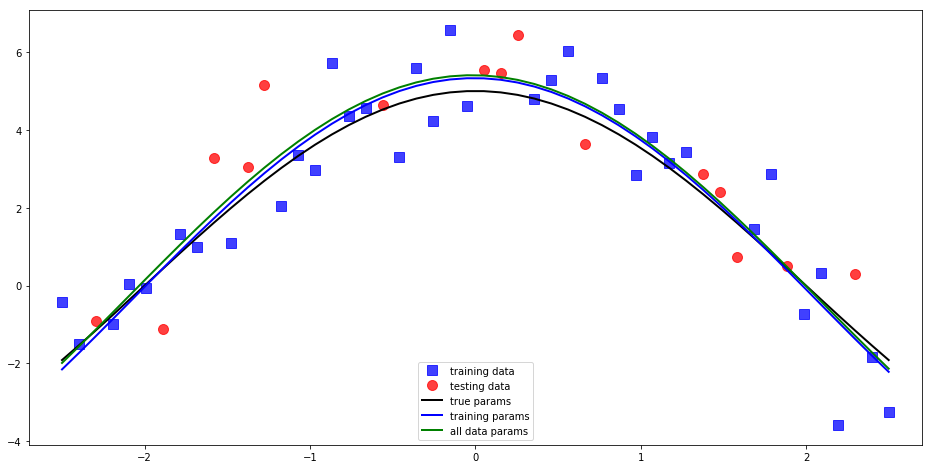

In [30]:
from code import model

import numpy as np
import os

# Load data
filenames = ["dataN50.txt", "dataN500.txt", "dataN5000.txt"]
data = model.load_data(os.path.join("data",filenames[0])) # use 0, 1 or 2
N = data.shape[0]
split = int(0.7*N)   # Change here

# Permute the data
np.random.seed(23)   # Change here
data = np.random.permutation(data)

# Do the split
training_data = data[:split,:]
testing_data = data[split:,:]

# Train model excluding the holdout set
training_params = model.get_params(training_data)

# Test with the holdout set
prediction_error = model.get_error(training_params, testing_data)
print("Prediction error estimated on {:.5} ".format(prediction_error))

# Train model with all the data
all_data_params = model.get_params(data)

# Report
model.full_report(training_data, testing_data, training_params, all_data_params)

# Plot the model
model.plot(training_data, testing_data, training_params, all_data_params)

## Desafío 2:
¿Que puede decir respecto al comportamiento del error al usar holdout set con los archivos con 50, 500 y 5000 elementos?

**R:**

...

## 5. Entrenando y Testeando los Modelos
A continuación se entrega el código necesario para entrenar los distintos modelos y realizar una predicción. 
Se proveen ejemplos de utilización.


#### Modelo A
$$ \log(A) = \alpha_0 +  \alpha_1 W_1 + \alpha_2 W_2 +\alpha_3 W_3 +\alpha_4 W_4 + \alpha_5 S + \alpha_6 \log L + \alpha_7 \log D+  \alpha_8 \log H$$

/home/sebastiandres/miniconda3/envs/mat281/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


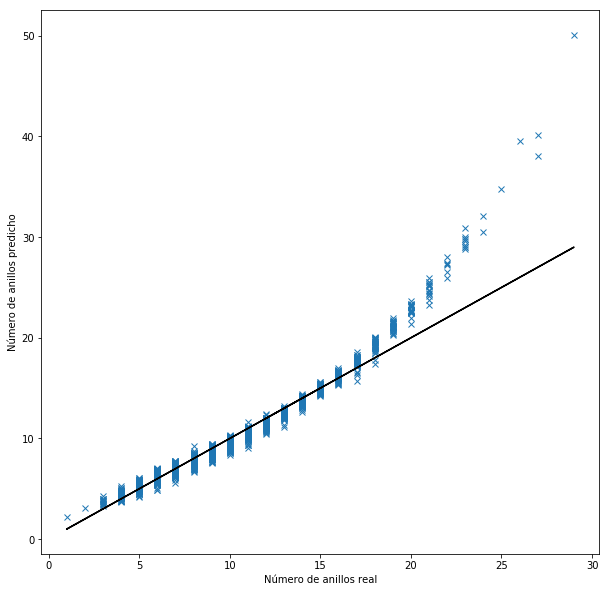

In [36]:
# 'sex','length','diameter','height','weight.whole','weight.shucked','weight.viscera','weight.shell','rings'
# Entrenando el modelo A
def train_model_A(data):
    y = np.log(data[:,-1])
    X = data.copy()
    X[:,0] = 1.0
    X[:,1:4] = np.log(X[:,1:4])
    coeffs = np.linalg.lstsq(X, y)[0]
    return coeffs

# Testeando el modelo A
def test_model_A(data, coeffs):
    X = data.copy()
    X[:,0] = 1.0
    X[:,1:4] = np.log(X[:,1:4])
    ln_anillos = np.dot(X, coeffs)
    return np.exp(ln_anillos)

# Obtener valores y prediccion
coeffs_A = train_model_A(abalone_data)
y_pred = test_model_A(abalone_data, coeffs_A)

# Mostrar graficamente
y_data = abalone_data[:,-1]
plt.figure(figsize=(10,10))
plt.title("")
plt.plot(y_data, y_pred, "x")
plt.plot(y_data, y_data, "k-")
plt.xlabel("Número de anillos real")
plt.ylabel("Número de anillos predicho")
plt.show()

#### Modelo B
$$ \log(A) = \beta_0 + \beta_1 W_1 + \beta_2 W_2 +\beta_3 W_3 +\beta W_4 + \beta_5 \log( L  D H ) $$

/home/sebastiandres/miniconda3/envs/mat281/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


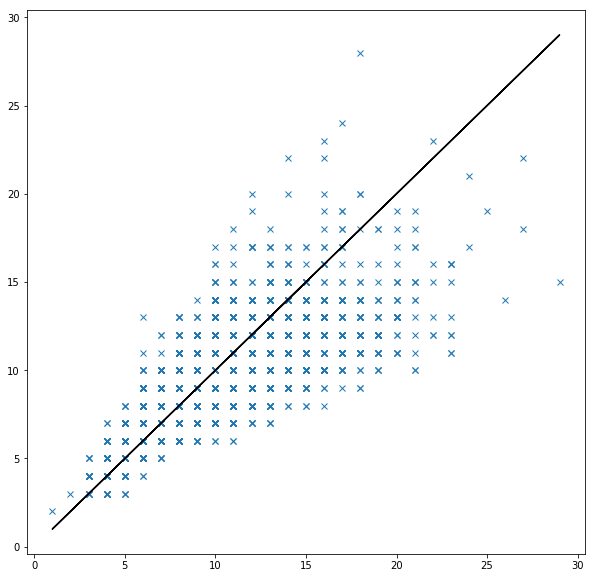

In [35]:
# 'sex','length','diameter','height','weight.whole','weight.shucked','weight.viscera','weight.shell','rings'
# Entrenando el modelo B
def train_model_B(data):
    y = np.log(data[:,-1])
    X = np.ones([data.shape[0],6])
    X[:,0] = 1.0
    X[:,1:5] = data[:,4:8]
    X[:,5] = np.log(data[:,1]*data[:,2]*data[:,3]) 
    coeffs = np.linalg.lstsq(X, y)[0]
    return coeffs

# Testeando el modelo B
def test_model_B(data, coeffs):
    X = np.ones([data.shape[0],6])
    X[:,0] = 1.0
    X[:,1:5] = data[:,4:8]
    X[:,5] = np.log(data[:,1]*data[:,2]*data[:,3]) 
    ln_anillos = np.dot(X, coeffs)
    return np.round(np.exp(ln_anillos))

# Obtener valores y prediccion
coeffs_B = train_model_B(abalone_data)
y_pred = test_model_B(abalone_data, coeffs_B)

# Mostrar graficamente
plt.figure(figsize=(10,10))
plt.plot(y_data, y_pred, "x")
plt.plot(y_data, y_data, "k-")
plt.show()

#### Modelo C
Si $S=male$:
$$ \log(A) = \theta_0^M + \theta_1^M W_2  + \theta_2^M W_4 + \theta_3^M \log( L  D H ) $$
Si $S=female$
$$ \log(A) = \theta_0^F + \theta_1^F W_2  + \theta_2^F W_4 + \theta_3^F \log( L  D H ) $$
Si $S=indefined$
$$ \log(A) = \theta_0^I + \theta_1^I W_2  + \theta_2^I W_4 + \theta_3^I \log( L  D H ) $$


/home/sebastiandres/miniconda3/envs/mat281/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  del sys.path[0]
/home/sebastiandres/miniconda3/envs/mat281/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
/home/sebastiandres/miniconda3/envs/mat281/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the i

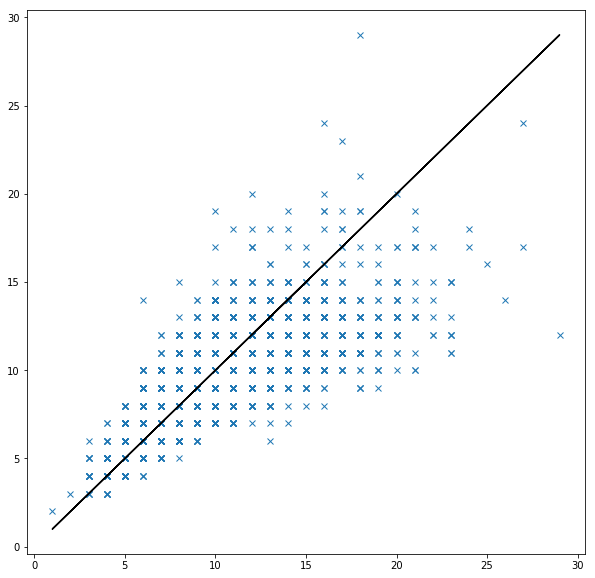

In [34]:
# 'sex','length','diameter','height','weight.whole','weight.shucked','weight.viscera','weight.shell','rings'
# Entrenando el modelo C
def train_model_C(data):
    mask_I = data[:,0] == 0
    mask_M = data[:,0] == +1
    mask_F = data[:,0] == -1
    y = np.log(data[:,-1])
    X = np.ones([data.shape[0], 4])
    X[:,0] = 1.0
    X[:,1] = data[:,5]
    X[:,2] = data[:,7]
    X[:,3] = np.log(data[:,1]*data[:,2]*data[:,3]) 
    coeffs_I = np.linalg.lstsq(X[mask_I], y[mask_I])[0]
    coeffs_M = np.linalg.lstsq(X[mask_M], y[mask_M])[0]
    coeffs_F = np.linalg.lstsq(X[mask_F], y[mask_F])[0]
    return (coeffs_I, coeffs_M, coeffs_F)

# Testeando el modelo C
def test_model_C(data, coeffs):
    mask_I = data[:,0] == 0
    mask_M = data[:,0] == +1
    mask_F = data[:,0] == -1
    y = np.log(data[:,-1])
    X = np.ones([data.shape[0], 4])
    X[:,0] = 1.0
    X[:,1] = data[:,5]
    X[:,2] = data[:,7]
    X[:,3] = np.log(data[:,1]*data[:,2]*data[:,3]) 
    # Fill up the solution
    ln_anillos = np.zeros(data[:,0].shape)
    ln_anillos[mask_I] = np.dot(X[mask_I], coeffs[0])
    ln_anillos[mask_M] = np.dot(X[mask_M], coeffs[1])
    ln_anillos[mask_F] = np.dot(X[mask_F], coeffs[-1])
    return np.round(np.exp(ln_anillos))

# Obtener valores y prediccion
coeffs_C = train_model_C(abalone_data)
y_pred = test_model_C(abalone_data, coeffs_C)

# Mostrar graficamente
plt.figure(figsize=(10,10))
plt.plot(y_data, y_pred, "x")
plt.plot(y_data, y_data, "k-")
plt.show()

## Desafío 3
Realice un gráfico en el cual se comparan simultáneamente el número de anillos reales vs el número de anillos estimados con los modelos A, B y C, únicamente para el caso de los abalones de sexo masculino.

In [ ]:
# Realice aqui su grafico
plt.figure(figsize=(16,8))
plt.plot()
plt.show()

## 5. Obteniendo el error de medición

Utilice Holdout Set para obtener una estimación razonable del error predictivo de los modelos A, B y C.

In [ ]:
# Implemente aquí su algoritmo para obtener el error predictivo de los métodos #

# 1. Divida los datos en entramiento y test

# 2. Entrene los modelos

# 3. Obtenga la predicción de los modelos

# 4. Calcule el error de los modelos


## Desafíos Finales

#### 1. ¿Cuál es el error predictivo tiene el modelo A?
    # FIX ME

#### 2. ¿Cuál es el error predictivo tiene el modelo B?
    # FIX ME

#### 3. ¿Cuál es el error predictivo tiene el modelo C?
    # FIX ME

#### 4. ¿Cuál modelo resulta mejor? ¿Cuál es su explicación?
    # FIX ME

#### 5. ¿Existe algún modelo que sea dimensionablemente consistente?
    # FIX ME
